# 02 - Clustering and Visualization of Behavioral Product Representations

In this notebook we analyze whether simple behavioral features
(log-view, log-cart, log-purchase) induce meaningful product clusters.


In [3]:
import pandas as pd
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


Load Features

In [4]:

from pathlib import Path

# Set paths
PROJECT_ROOT = Path("..").resolve()
DATA_RAW_DIR = PROJECT_ROOT / "data" / "raw"
DATA_PROCESSED_DIR = PROJECT_ROOT / "data"

PROJECT_ROOT, DATA_RAW_DIR, DATA_PROCESSED_DIR



DATA_DIR = Path("..") / "data"
features = pd.read_csv(DATA_DIR / "product_behavior_features.csv")

features.head()


,product_id,view,cart,purchase,category_code,log_view,log_cart,log_purchase
0,1000978,40,0,0,electronics.smartphone,3.713572,0.0,0.0
1,1001588,25,0,0,electronics.smartphone,3.258097,0.0,0.0
2,1001606,1,0,0,electronics.smartphone,0.693147,0.0,0.0
3,1002042,1,0,0,electronics.smartphone,0.693147,0.0,0.0
4,1002062,35,0,0,electronics.smartphone,3.583519,0.0,0.0


Select Numerical Features

In [6]:
X = features[["log_view", "log_cart", "log_purchase"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape


(63695, 3)

KMeans Clustering

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
features["cluster"] = kmeans.fit_predict(X_scaled)

features["cluster"].value_counts()


cluster
0    44019
3    15509
2     2352
4     1496
1      319
Name: count, dtype: int64

PCA to 2D

In [8]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

features["pc1"] = X_2d[:, 0]
features["pc2"] = X_2d[:, 1]

features[["pc1", "pc2"]].head()


,pc1,pc2
0,1.223872,2.383499
1,0.948008,1.949149
2,-0.605482,-0.496835
3,-0.605482,-0.496835
4,1.145104,2.259478


Visualize Clusters

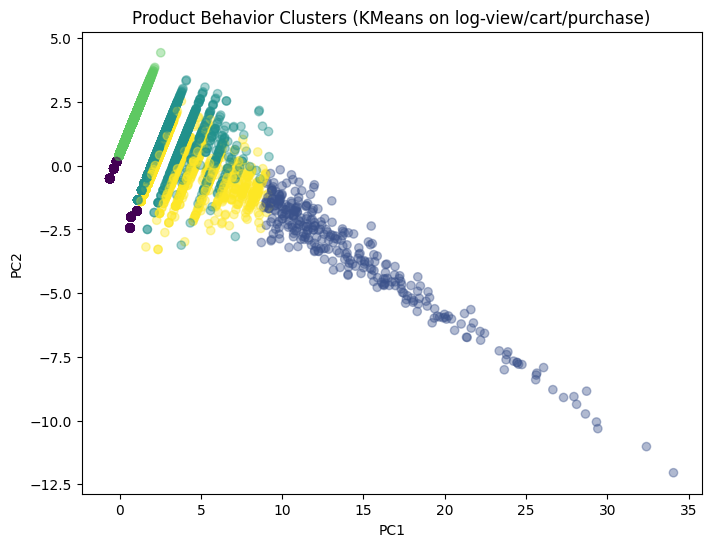

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(
    features["pc1"],
    features["pc2"],
    c=features["cluster"],
    alpha=0.4
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Product Behavior Clusters (KMeans on log-view/cart/purchase)")
plt.show()


Visualize by Category (Sample)

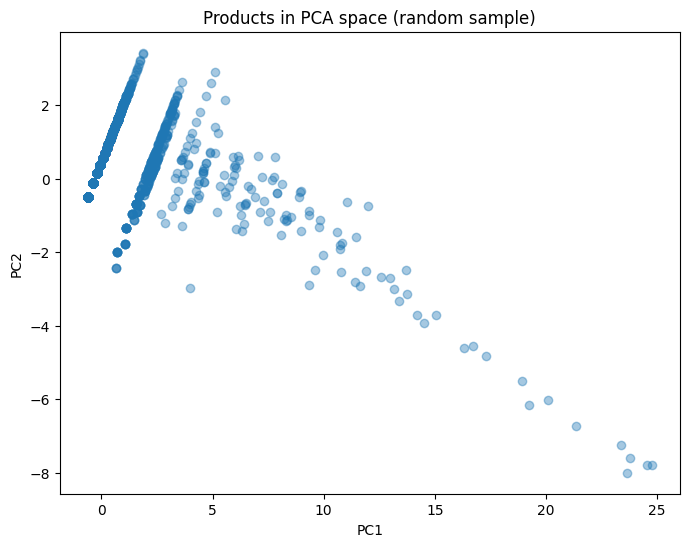

In [10]:
sample = features.dropna(subset=["category_code"]).sample(5000, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(sample["pc1"], sample["pc2"], alpha=0.4)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Products in PCA space (random sample)")
plt.show()
